In [49]:
import yaml
from yaml.loader import SafeLoader
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest

from yellowbrick.target import FeatureCorrelation
from yellowbrick.target import ClassBalance
from yellowbrick.features import Rank1D, Rank2D
from yellowbrick.features import Manifold
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.features import PCA

from tests.eda import plot_prop_x_prop
from src.datamanager.dataset_manager import FeaturesManager

np.random.seed(171)

Load data

In [2]:
pos_fasta = '../data/raw-data/fasta/Bacillus_pos.fa'
neg_fasta = '../data/raw-data/fasta/Bacillus_neg.fa'

In [3]:
with open('../params/exp-test-eda.yaml') as f:
    args_data = yaml.load(f, Loader=SafeLoader)
    print(args_data['features'][0])

{'k': 2, 'encode': 'prop', 'slice': [59, 20, 20]}


In [4]:
dm = FeaturesManager(fasta_paths=(pos_fasta, neg_fasta))
dm.transform_raw_dataset(params=args_data['features'])

prop = 0
pos_data = pd.DataFrame(dm.datasets[0].encoded_classes_datasets[0][prop])
neg_data = pd.DataFrame(dm.datasets[0].encoded_classes_datasets[1][prop])
print(f'POS: {pos_data.shape} | NEG: {neg_data.shape}')

POS: (373, 40) | NEG: (1000, 40)


[<AxesSubplot: > <AxesSubplot: >]


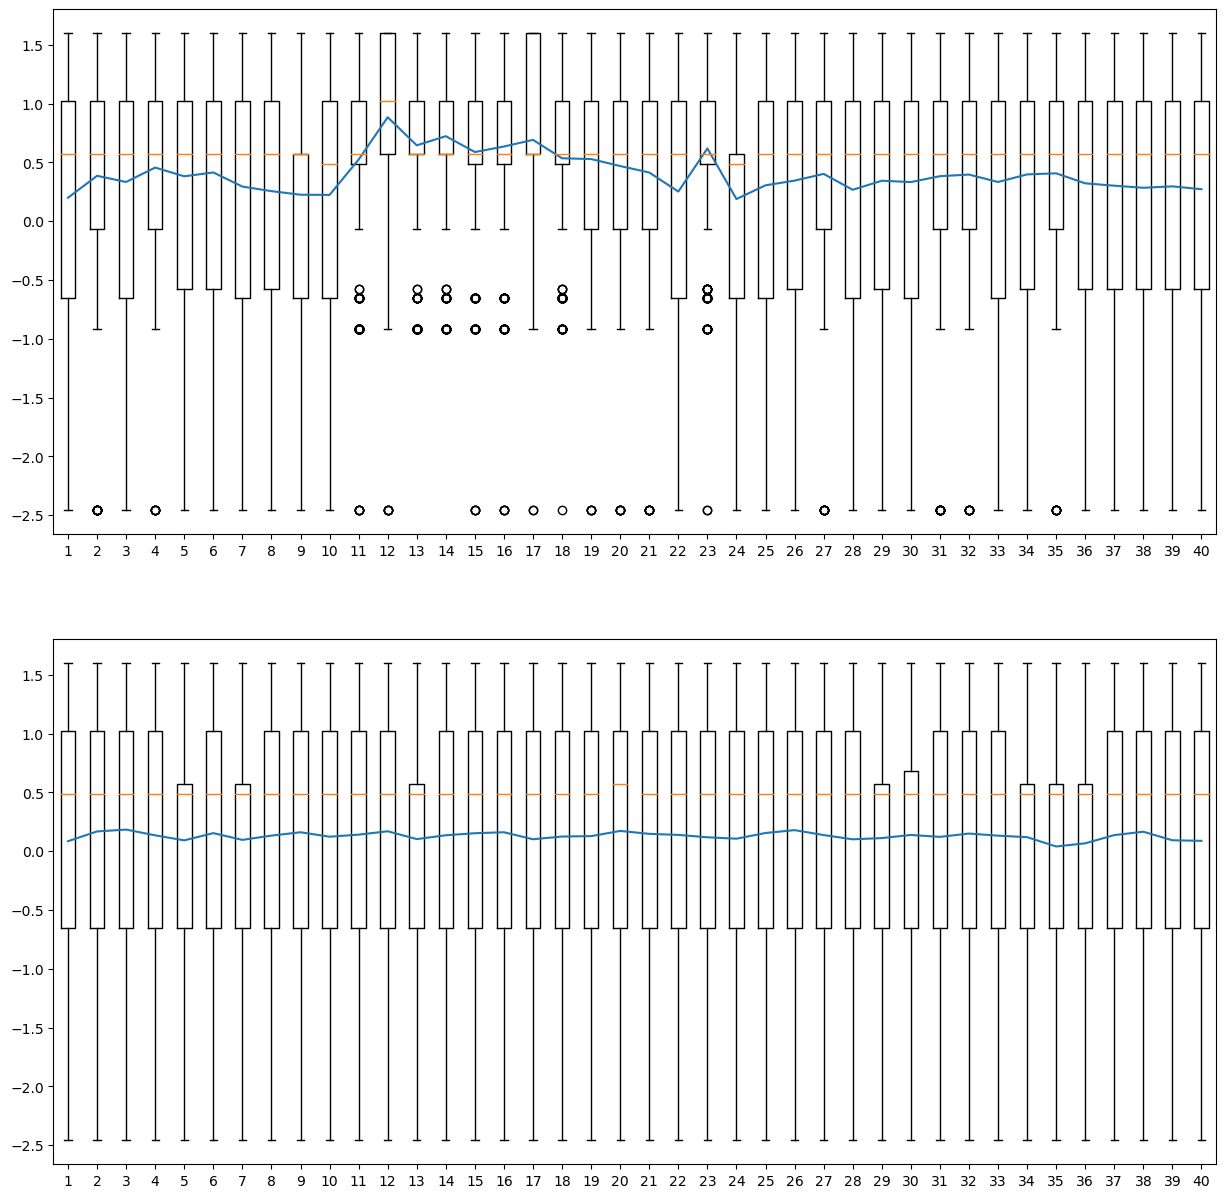

In [5]:
fig, ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
print(ax)
ax[0].boxplot(pos_data)
ticks = ax[0].get_xticks()
ax[0].plot(ticks, pos_data.mean())
ax[1].boxplot(neg_data)
ticks = ax[1].get_xticks()
ax[1].plot(ticks, neg_data.mean())
plt.show()

In [6]:
X = pd.DataFrame(np.vstack([pos_data, neg_data]))
y = np.zeros(len(X))
y[len(pos_data):] += 1

In [7]:
# Remove a position
pos = 5
X.drop(pos, axis=1).shape

(1373, 39)

In [8]:
model = GradientBoostingClassifier(random_state=237)
n_cv = 5
vals = list()
for i in range(40):
    scores = cross_val_score(model, X.drop(i, axis=1), y, cv=n_cv)
    mean_score = np.mean(scores)
    vals.append(mean_score)
    print(f'MEAN:{mean_score} | POS DROPED: {i}')
plt.plot(vals)

MEAN:0.8718619774386198 | POS DROPED: 0
MEAN:0.8704047777040479 | POS DROPED: 1
MEAN:0.8769555408095554 | POS DROPED: 2
MEAN:0.8718593231585933 | POS DROPED: 3
MEAN:0.8755116124751161 | POS DROPED: 4
MEAN:0.8711400132714001 | POS DROPED: 5
MEAN:0.8718619774386198 | POS DROPED: 6
MEAN:0.8718672859986729 | POS DROPED: 7
MEAN:0.8682123424021235 | POS DROPED: 8
MEAN:0.8711267418712675 | POS DROPED: 9
MEAN:0.8653085600530857 | POS DROPED: 10
MEAN:0.8441698739216987 | POS DROPED: 11
MEAN:0.8667790311877903 | POS DROPED: 12
MEAN:0.8667577969475782 | POS DROPED: 13
MEAN:0.8776934306569343 | POS DROPED: 14
MEAN:0.8558354346383543 | POS DROPED: 15
MEAN:0.8587684140676842 | POS DROPED: 16
MEAN:0.8689422694094228 | POS DROPED: 17
MEAN:0.8638513603185135 | POS DROPED: 18
MEAN:0.8674903782349037 | POS DROPED: 19
MEAN:0.8740570670205707 | POS DROPED: 20
MEAN:0.8718619774386198 | POS DROPED: 21
MEAN:0.8805998672859985 | POS DROPED: 22
MEAN:0.8674956867949568 | POS DROPED: 23
MEAN:0.8747737226277372 | 

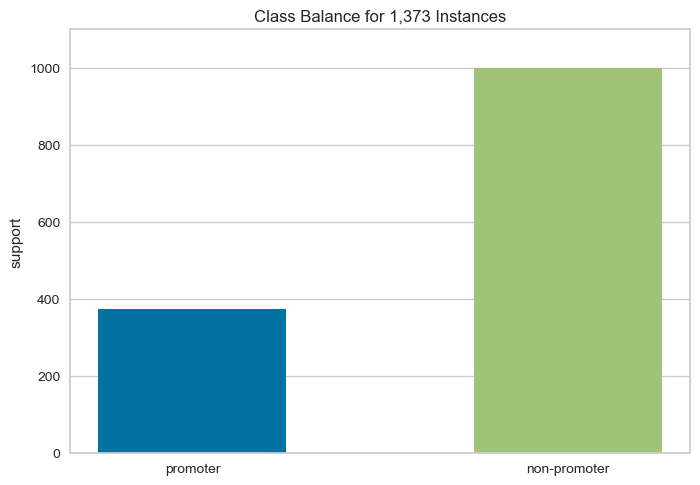

<AxesSubplot: title={'center': 'Class Balance for 1,373 Instances'}, ylabel='support'>

In [24]:
classes = ["promoter", "non-promoter"]
# Instantiate the visualizer
visualizer = ClassBalance(labels=classes)

visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

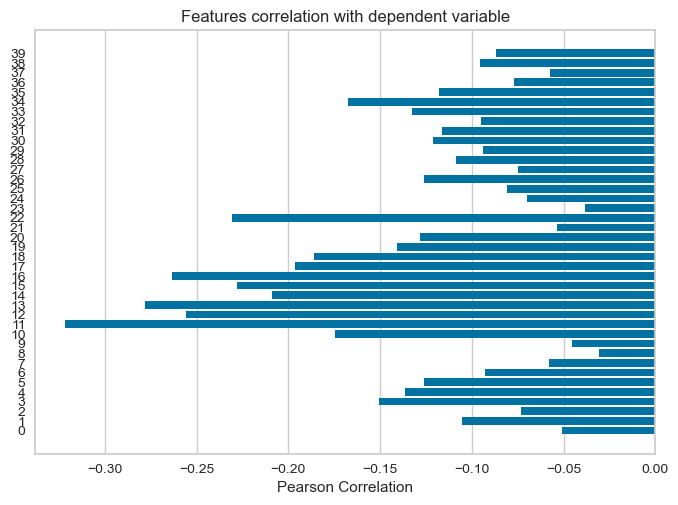

<AxesSubplot: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [14]:
# Create a list of the feature names
features = np.array(X.columns)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

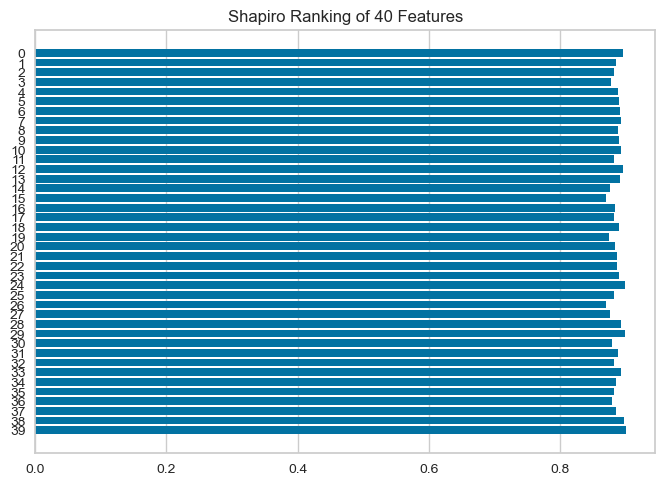

<AxesSubplot: title={'center': 'Shapiro Ranking of 40 Features'}>

In [18]:
# Instantiate the 1D visualizer with the Shapiro ranking algorithm
visualizer = Rank1D(algorithm='shapiro')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

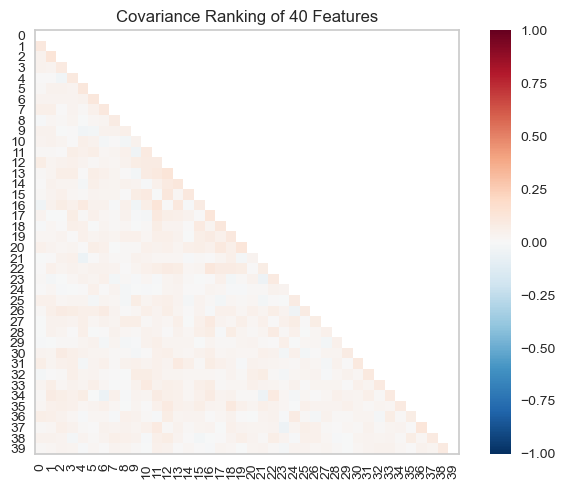

<AxesSubplot: title={'center': 'Covariance Ranking of 40 Features'}>

In [22]:
# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

C:\Users\lauro\anaconda3\envs\bioseq-doc\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\lauro\anaconda3\envs\bioseq-doc\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


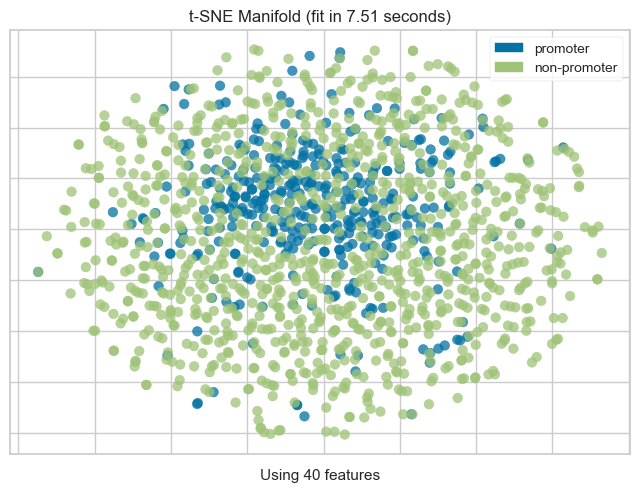

<AxesSubplot: title={'center': 't-SNE Manifold (fit in 7.51 seconds)'}, xlabel='Using 40 features'>

In [34]:
# Instantiate the visualizer
_y = LabelEncoder().fit_transform(y)
viz = Manifold(manifold="tsne", classes=classes)
viz.fit_transform(X, _y)  # Fit the data to the visualizer
viz.show()               # Finalize and render the figure

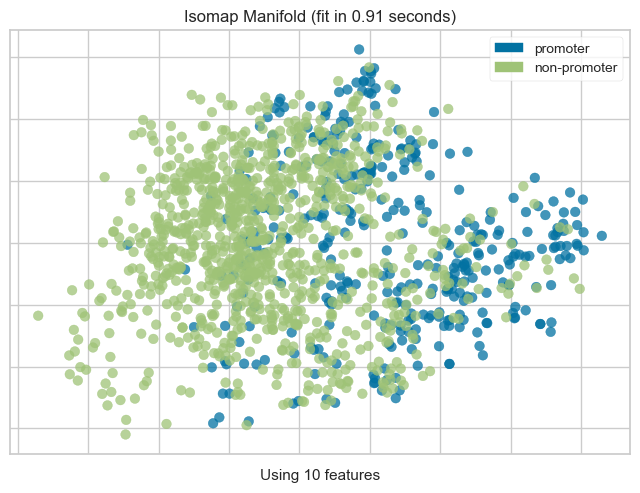

<AxesSubplot: title={'center': 'Isomap Manifold (fit in 0.91 seconds)'}, xlabel='Using 10 features'>

In [40]:
# Create a pipeline
model = Pipeline([
    ("selectk", SelectKBest(k=10, score_func=f_classif)),
    ("viz", Manifold(manifold="isomap", n_neighbors=5, classes=classes)),
])

model.fit_transform(X, _y)          # Fit the data to the model
model.named_steps['viz'].show()   # Finalize and render the figure

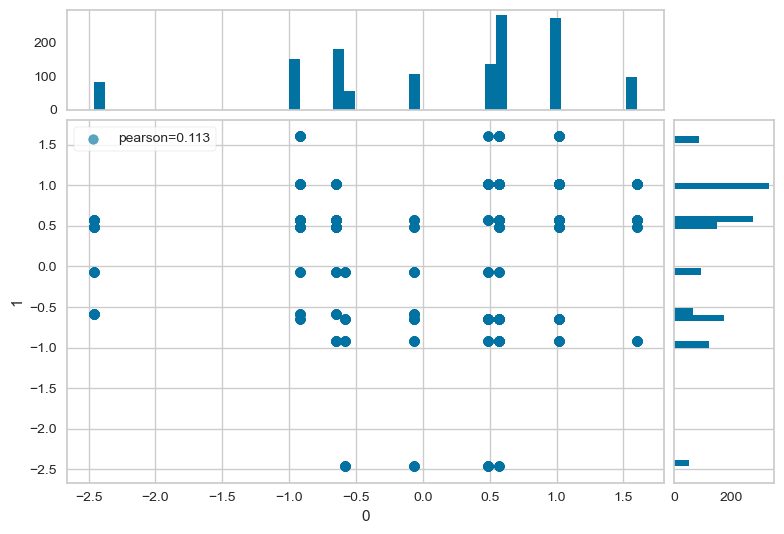

<AxesSubplot: xlabel='0', ylabel='1'>

In [48]:
# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns=[0, 1])

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

C:\Users\lauro\anaconda3\envs\bioseq-doc\lib\site-packages\yellowbrick\features\pca.py:458: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout()


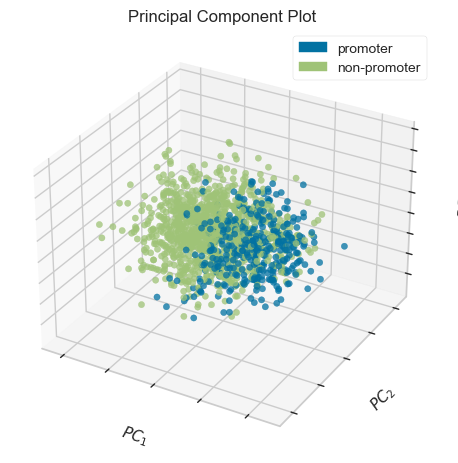

<Axes3DSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$', zlabel='$PC_3$'>

In [51]:
visualizer = PCA(
    scale=True, projection=3, classes=classes
)
visualizer.fit_transform(X, _y)
visualizer.show()